# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype,is_bool_dtype
import seaborn as sns

## Data Wrangling/Cleaning

In [43]:
user = pd.read_json("ultimate_data_challenge.json")

In [44]:
user.shape

(50000, 12)

In [45]:
user.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [46]:
user.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [47]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [48]:
user.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


##### Missing Data handling

In [49]:
#The count of missing values
missing_count = user.isnull().sum()
missing_count

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

- Columns avg_rating_of_driver, phone, avg_rating_by_driver has missing values.

In [50]:
#The count of all values
value_count = user.isnull().count()
missing_percentage = round((missing_count / value_count) * 100,2) #percentage of missing values
missing_df = pd.DataFrame({'count':missing_count, 'percentage':missing_percentage}) # create df 
missing_df

,count,percentage
city,0,0.00
trips_in_first_30_days,0,0.00
signup_date,0,0.00
avg_rating_of_driver,8122,16.24
avg_surge,0,0.00
last_trip_date,0,0.00
phone,396,0.79
surge_pct,0,0.00
ultimate_black_user,0,0.00
weekday_pct,0,0.00


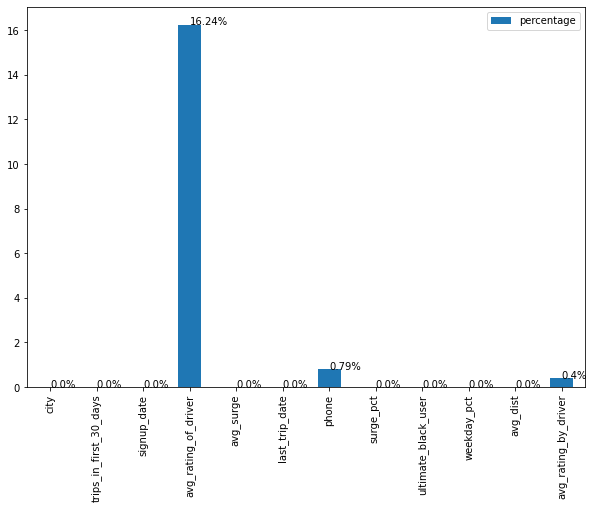

In [51]:
#visualize the percentage of the missing value based on the data frame “missing_df”

barchart = missing_df.plot.bar(y='percentage',figsize=(10,7))
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%')

- Avg_rating_of_driver has aroud 16.24%, phone column has 0.79% and Avg_rating_by_driver has around 0.4% missing values.

##### Feature Engineering

In [52]:
#Replacing missing values in Avg_rating_of_driver,Avg_rating_by_driver with mean
user['avg_rating_of_driver'] = user['avg_rating_of_driver'].fillna(user['avg_rating_of_driver'].mean())
user['avg_rating_by_driver'] = user['avg_rating_by_driver'].fillna(user['avg_rating_by_driver'].mean())

In [53]:
user.shape

(50000, 12)

In [54]:
user.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

In [55]:
# dropping the rows with null values for phone column 
user.dropna(inplace=True)

In [57]:
user.shape

(49604, 12)

last_trip_date and signup_date should be converted into date type.

In [58]:
user['last_trip_date'] = pd.to_datetime(user['last_trip_date'])
user['signup_date'] = pd.to_datetime(user['signup_date'])

In [59]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [88]:
#create the list of numeric and categorical attributes

num_list = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','weekday_pct', 'avg_dist','surge_pct','avg_rating_by_driver']
cat_list = ['city', 'phone','ultimate_black_user']
        
print("numeric attributes : ", num_list)
print("Categorical attributes : ", cat_list)

numeric attributes :  ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'weekday_pct', 'avg_dist', 'surge_pct', 'avg_rating_by_driver']
Categorical attributes :  ['city', 'phone', 'ultimate_black_user']


## Exploratory Data Analysis

### Univariate Analysis

Categorical Variables → Bar chart

Numerical Variables → histogram

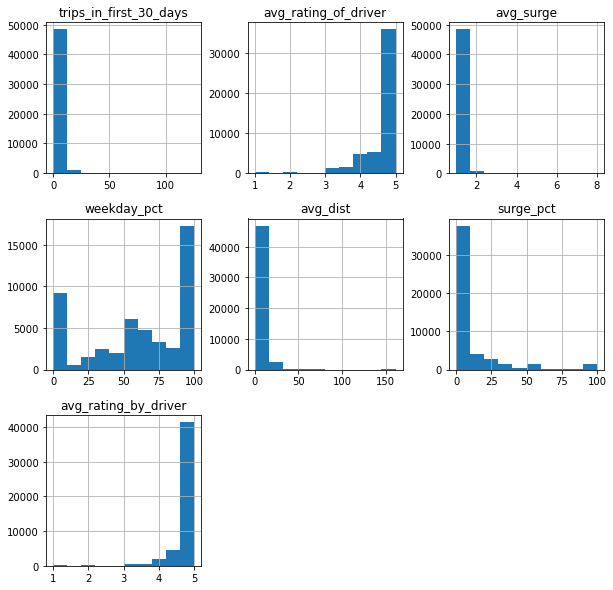

In [89]:
#histograms for each variable in df
hist = user[num_list].hist(bins=10,figsize =(10,10))

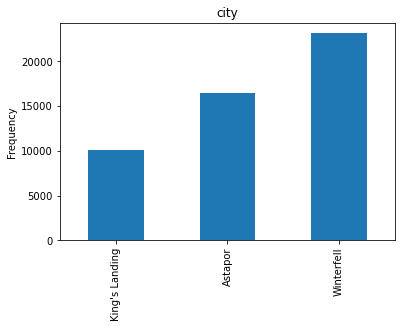

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


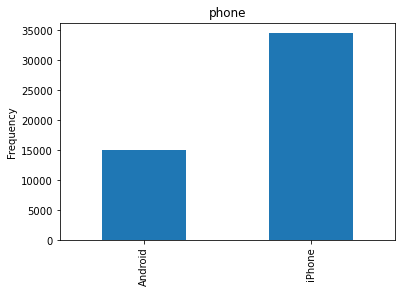

iPhone     34582
Android    15022
Name: phone, dtype: int64


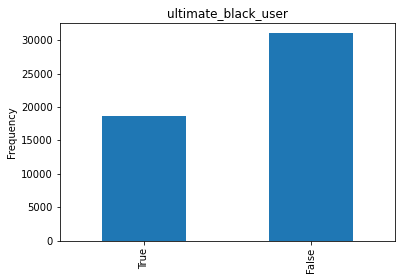

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [99]:
#bar chart for each categorical in df
plt.figure()
for i in cat_list:
    user[i].value_counts().sort_values().plot(kind='bar')
    plt.title(i)
    plt.ylabel('Frequency')
    plt.show()
    print(user[i].value_counts())
    

#### Multivariate Analysis

<AxesSubplot:>

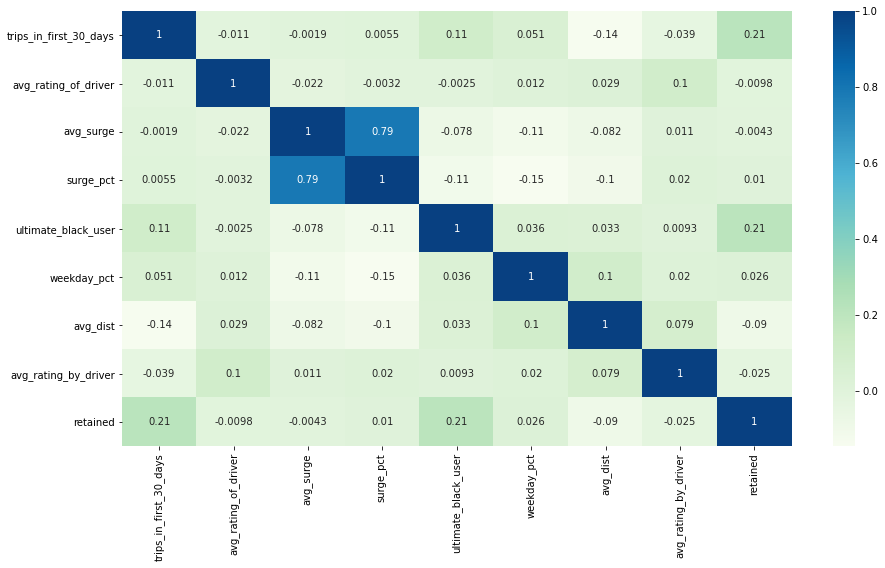

In [111]:
plt.figure(figsize = (15,8))
correlation = user.corr()
sns.heatmap(correlation, cmap='GnBu', annot=True)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


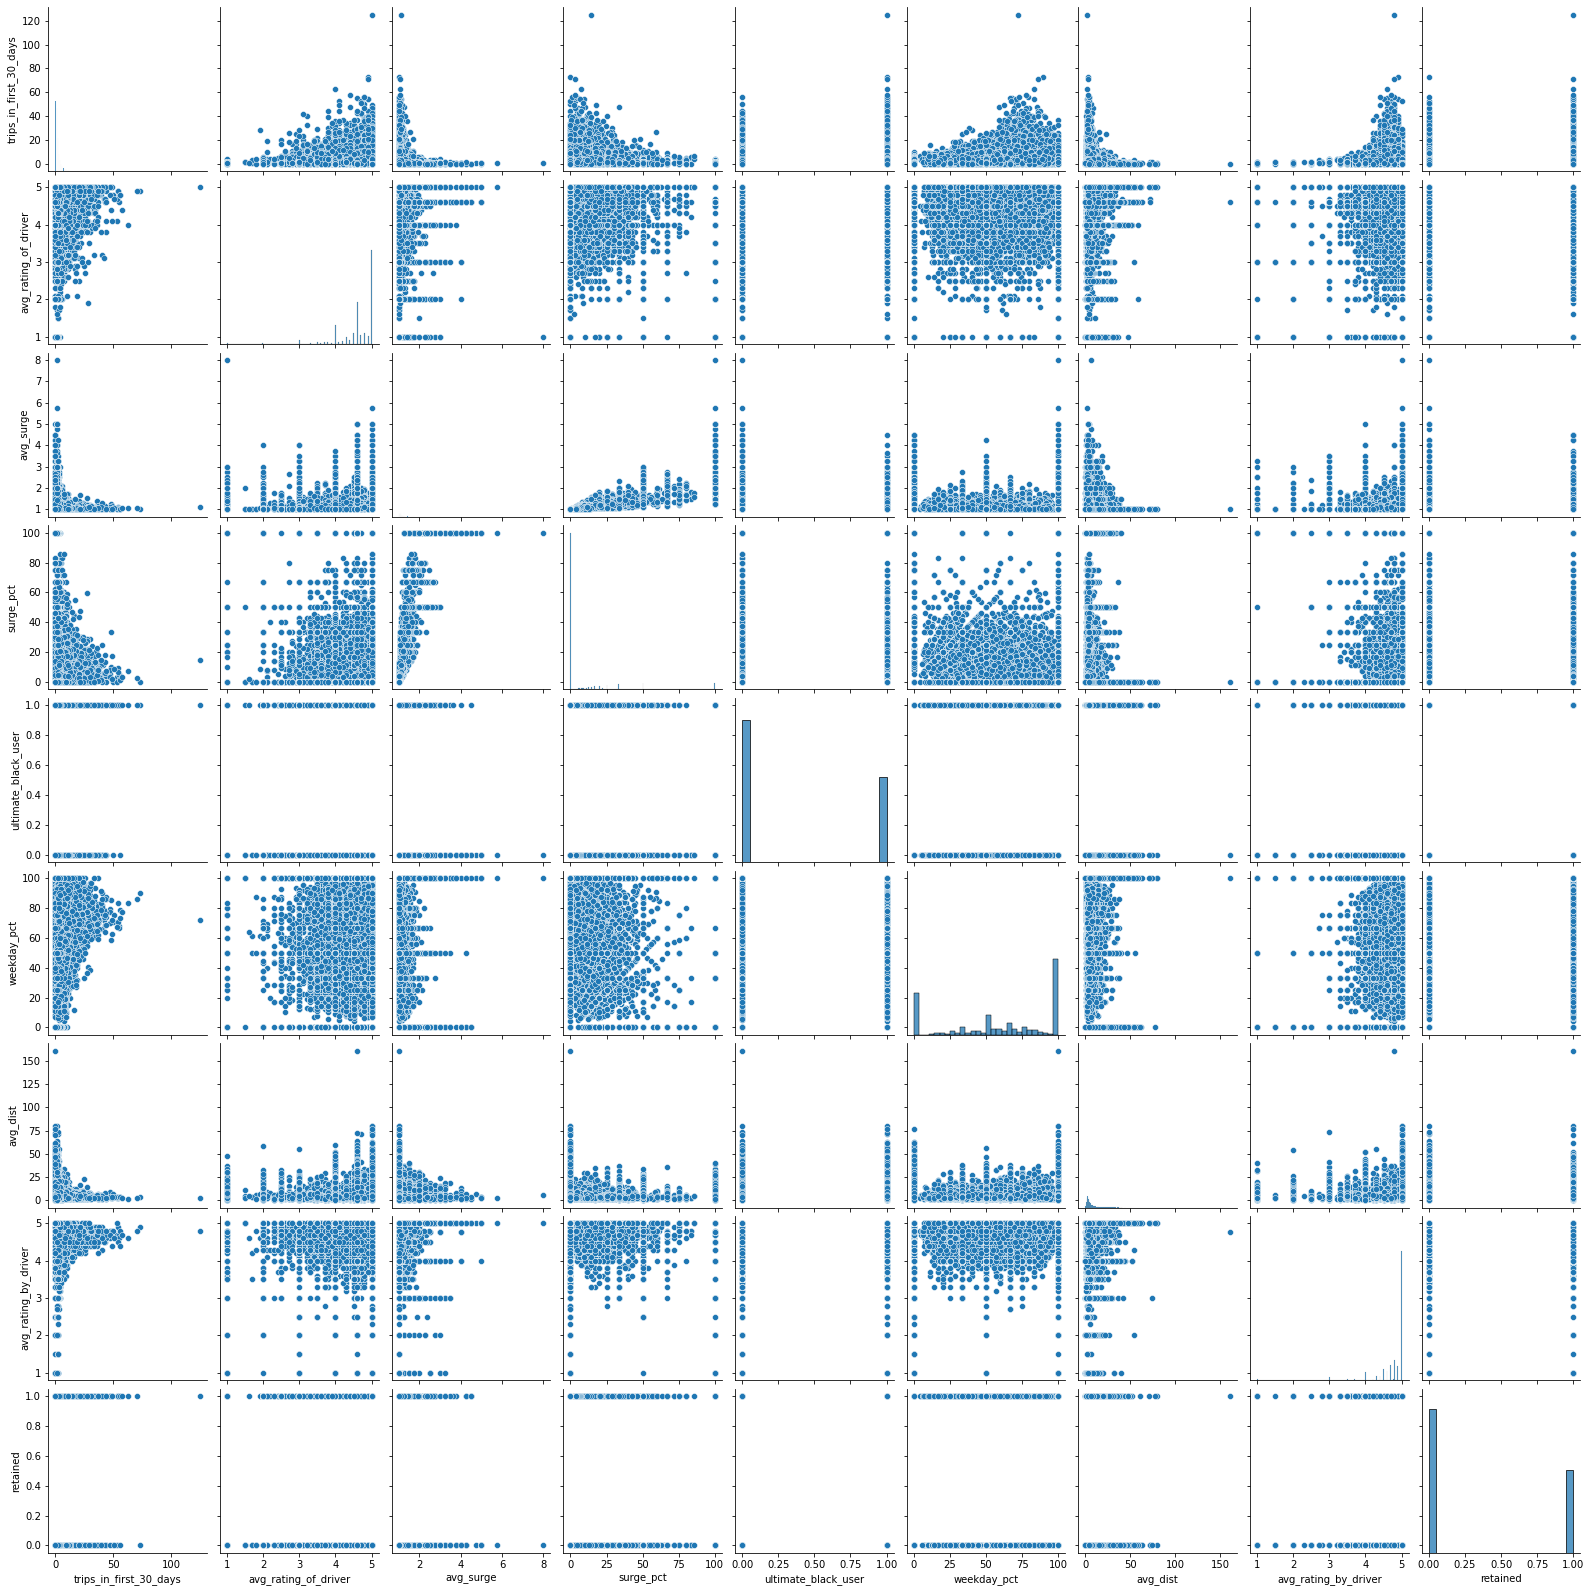

In [112]:
#since the correlation matrix only indicates the strength of linear relationship, it is better to plot the numerical 
#variables using seaborn function sns.pairplot(). both the sns.heatmap() and sns.pairplot() function ignore non-numeric data type.

sns.pairplot(user,height=2.5)

In [97]:
user['last_trip_date'].min(), user['last_trip_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

As per the requirement, a rider/user is considered as "retained", if he/she was active in last 30 days.
the max last trip date is 2014-07-01. subtracting 30 days from this date gives us 2014-06-01. 
This means, if the last time user completed a trip after 2014-06-01, then that user is active.
we will filter the records on this date.

In [102]:
user['retained'] = (user['last_trip_date'] > '2014-06-01')*1

In [103]:
user.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [104]:
user.shape

(49604, 13)

In [105]:
#dropping the columns which are not required
user.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [106]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               49604 non-null  float64
 6   ultimate_black_user     49604 non-null  bool   
 7   weekday_pct             49604 non-null  float64
 8   avg_dist                49604 non-null  float64
 9   avg_rating_by_driver    49604 non-null  float64
 10  retained                49604 non-null  int32  
dtypes: bool(1), float64(6), int32(1), int64(1), object(2)
memory usage: 4.0+ MB


## Preprocessing

In [107]:
# Creating dummy variables for categorical features
X_req = user.drop('retained', axis=1)
X = pd.get_dummies(X_req, columns = cat_list, prefix =cat_list, drop_first=True)
y = user['retained']

In [108]:
X

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.700000,1.10,15.4,46.2,3.67,5.0,1,0,1,1
1,0,5.000000,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.300000,1.00,0.0,100.0,0.77,5.0,0,0,1,0
3,9,4.600000,1.14,20.0,80.0,2.36,4.9,1,0,1,1
4,14,4.400000,1.19,11.8,82.4,3.13,4.9,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,100.0,5.63,4.2,1,0,1,0
49996,1,4.601559,1.00,0.0,0.0,0.00,4.0,0,0,1,0
49997,0,5.000000,1.00,0.0,100.0,3.86,5.0,0,1,0,1
49998,2,3.000000,1.00,0.0,100.0,4.58,3.5,0,0,1,0


In [133]:
y.value_counts()

0    31424
1    18180
Name: retained, dtype: int64

### Model Building

#### Logistic Regression : This regressor need data in scaled format

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


In [114]:
# Logistic, SVM, Neural Networks and KNN are sensitive to scaling.  
#Since we are using these algorithms, we should use scaled data in these models.

from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [115]:
X_train_scaled

array([[ 0.72036178,  0.70249425, -0.33402213, ..., -0.93732285,
        -1.52039735,  1.29441065],
       [ 0.18862103,  0.70249425, -0.33402213, ...,  1.06686826,
         0.6577228 , -0.77255236],
       [-0.34311971, -1.05532442, -0.33402213, ..., -0.93732285,
        -1.52039735, -0.77255236],
       ...,
       [ 0.98623215, -2.11001562, -0.33402213, ...,  1.06686826,
         0.6577228 , -0.77255236],
       [-0.34311971, -1.05532442, -0.33402213, ...,  1.06686826,
         0.6577228 , -0.77255236],
       [ 6.83538029, -2.81314309, -0.24520159, ...,  1.06686826,
         0.6577228 ,  1.29441065]])

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [117]:
log_reg = LogisticRegression(random_state=42)
# Fit the model on the trainng data.
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [118]:
results = cross_val_score(log_reg,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.72558901 0.72294318 0.72621897 0.72794859 0.7219002 ]
0.7249199911500648


In [119]:
#test score 
log_reg.score(X_test_scaled, y_test)

0.7198871081544199

In [120]:
y_pred = log_reg.predict(X_test_scaled)

In [121]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5368,  922],
       [1857, 1774]], dtype=int64)

In [122]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('LogisticRegression Accuracy : ', "%.2f" % (acc_score*100))
print('LogisticRegression F1 : ', "%.2f" % (f1*100))

LogisticRegression Accuracy :  71.99
LogisticRegression F1 :  70.89


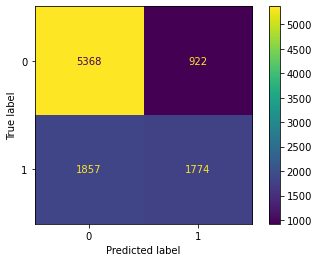

In [123]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6290
           1       0.66      0.49      0.56      3631

    accuracy                           0.72      9921
   macro avg       0.70      0.67      0.68      9921
weighted avg       0.71      0.72      0.71      9921



#### RandomForestClassifier : This algorithm does not need data to be scaled.

In [126]:
#class_weight={1: 0.15, 2:0.5, 3: 1.5},random_state=42,verbose=False
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [127]:
results = cross_val_score(rfc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.76804838 0.75885095 0.7661585  0.76499496 0.76234879]
0.7640803160829028


In [128]:
#test score
rfc.score(X_test, y_test)

0.7601048281423244

In [129]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[5138, 1152],
       [1228, 2403]], dtype=int64)

In [130]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



In [131]:
acc_score = accuracy_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc, average='weighted')
print('RandomForestClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('RandomForestClassifier F1 : ', "%.2f" % (f1*100))

RandomForestClassifier Accuracy :  76.01
RandomForestClassifier F1 :  75.96


#### Hyper Paramter Tunning

In [138]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [50,100,200, 500],
    'max_features': [2, 5, 10,'auto'],
    'max_depth' : [4,5,6,7,8]
}

rfc = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator = rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(X_train, y_train)
print("Best Score:" + str(CV_rfc.best_score_))
print("Best Parameters: " + str(CV_rfc.best_params_))

#Best Score:0.5144870239105703
#Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

Best Score:0.7858276632614907
Best Parameters: {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


After hyperparameter tuning, we get the best parameters of n_estimators=100, max_features=auto, max_depth=8 with accuracy of 78.58%.

#### Selected Model :

In [139]:
model = RandomForestClassifier(random_state=42,max_depth=8, max_features='auto', n_estimators= 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#test score
model.score(X_test, y_test)

0.7866142525955044

In [140]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest classifier+GridSearchCV accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier+GridSearchCV F1 : ', "%.2f" % (f1*100))

Random Forest classifier+GridSearchCV accuracy :  78.66
Random Forest classifier+GridSearchCV F1 :  78.29


In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6290
           1       0.74      0.64      0.69      3631

    accuracy                           0.79      9921
   macro avg       0.77      0.76      0.76      9921
weighted avg       0.78      0.79      0.78      9921



Text(0.5, 1.0, 'ROC Curve')

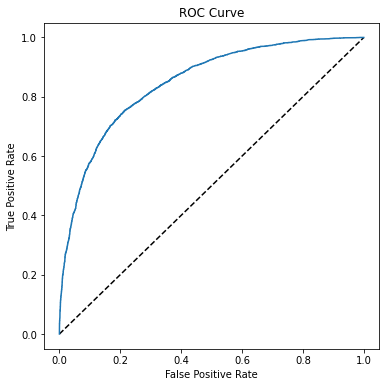

In [145]:
# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [146]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8474


The metrics of selected model are:

Test set accuracy: 78.66%

AUC: 0.8474

##### Feature Selection : 

11


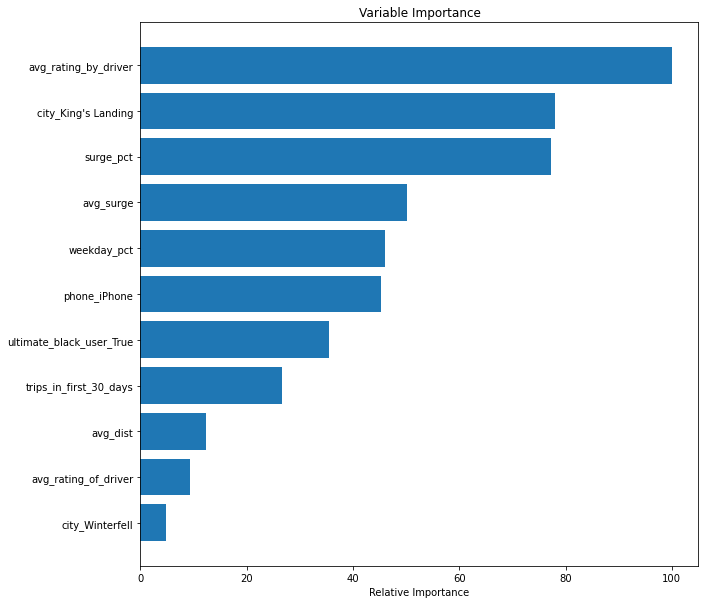

In [147]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [148]:
fi = pd.DataFrame(list(zip(X.columns, model.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
6,avg_rating_by_driver,0.205955
7,city_King's Landing,0.160562
3,surge_pct,0.159291
2,avg_surge,0.103282
4,weekday_pct,0.094728


Above graph shows, avg_rating_by_driver as the most important feature

In [ ]:
## Summary :

To improve its long term rider retention, Ultimate should concentrate on getting better avg_rating_by_driver.
avg_rating_by_driver : the rider’s average rating over all of their trips

Providing better services over their trips to driver can resut in better average rating.